# Analisis Genre Musik dan Hubungannya dengan Konsentrasi Belajar pada Mahasiswa

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Pengaruh Musik terhadap Tingkat Konsentrasi saat Belajar  (Responses) - Form Responses 1.csv")

Data dikumpulkan melalui survei online yang dibagikan dalam bentuk Google Form kepada mahasiswa kelas B27 BINUS University, Kemanggisan. Dari survey tersebut, didapatkan hasil berisi 164 respon survei mahasiswa dengan 27 fitur terkait pengaruh musik dalam proses belajar. 

Data mencakup informasi demografis, kebiasaan belajar, preferensi musik, serta persepsi responden mengenai efektivitas mendengarkan musik saat belajar. Beberapa kolom identitas (Nama Lengkap, NIM, WhatsApp) dikecualikan dari analisis untuk menjaga privasi. Dataset terdiri dari data kuantitatif (skala Likert) dan data kualitatif (jawaban terbuka), dengan sejumlah nilai kosong pada pertanyaan tentang background noise dan alasan tidak mendengarkan musik.

# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 27 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Timestamp                                                                                 164 non-null    object 
 1   Saya adalah mahasiswa B27 BINUS University, Kemanggisan                                   164 non-null    object 
 2   Nama Lengkap                                                                              164 non-null    object 
 3   NIM (Nomor Induk Mahasiswa)                                                               164 non-null    int64  
 4   No. Whatsapp (untuk undian)                                                               152 non-null    float64
 5   Jenis Kelamin                                            

In [4]:
exclude = ['Nama Lengkap', 'NIM (Nomor Induk Mahasiswa)','No. Whatsapp (untuk undian)']
df.head()[[col for col in df.columns if col not in exclude]]

,Timestamp,"Saya adalah mahasiswa B27 BINUS University, Kemanggisan",Jenis Kelamin,Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?,Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?,Seberapa sering Anda mendengarkan musik ketika belajar?,Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?,Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?,...,Mengapa Anda mendengarkan jenis lagu tersebut?,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.,Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?,Apakah Anda suka menggunakan background noise untuk belajar?,Kenapa Anda tidak mendengarkan musik saat belajar?
0,5/8/2025 16:21:24,Ya,Perempuan,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,ganggu fokus
1,5/9/2025 14:47:08,Ya,Laki-laki,Ya,Ya,4.0,Membantu,Membantu,Sangat Membantu,Sangat Membantu,...,membuat belajar menyenangkan,4.0,4.0,5.0,5.0,3.0,3.0,saya suka musik,NaN,NaN
2,5/10/2025 23:14:01,Ya,Laki-laki,Ya,Ya,5.0,Sangat Membantu,Tidak mendengar musik saat mengerjakan tugas,Tidak mendengar musik saat mengerjakan laporan...,Tidak mendengar musik saat belajar untuk ujian,...,-,4.0,4.0,4.0,3.0,4.0,5.0,-,NaN,NaN
3,5/11/2025 22:40:32,Ya,Laki-laki,Ya,Ya,4.0,Sangat Mengganggu,Mengganggu,Sangat Membantu,Sangat mengganggu,...,karena saya suka,4.0,3.0,4.0,4.0,2.0,4.0,"susah belajar kalau ga mood, musik bikin mood ...",NaN,NaN
4,5/12/2025 14:08:18,Ya,Perempuan,Ya,Ya,5.0,Biasa saja,Sangat Membantu,Sangat Membantu,Membantu,...,karena pop adalah genre favorit saya,5.0,4.0,5.0,5.0,3.0,5.0,bikin tidak bosan/ngantuk,NaN,NaN


Drop kolom yang tidak digunakan

In [5]:
df = df.drop(columns=['Timestamp','No. Whatsapp (untuk undian)','Nama Lengkap','Saya adalah mahasiswa B27 BINUS University, Kemanggisan'])

**Check duplicate**

In [6]:
df.duplicated().sum()

0

**Tahap Validasi Angkatan berdasarkan NIM**

In [7]:
df['NIM (Nomor Induk Mahasiswa)'].astype(str).str[:2].value_counts()

NIM (Nomor Induk Mahasiswa)
27    161
26      2
28      1
Name: count, dtype: int64

terdapat 3 orang yang bukan merupakan B27, sehingga data responden tersebut akan dihapus

In [8]:
df = df[df['NIM (Nomor Induk Mahasiswa)'].astype(str).str.startswith('27')]
df = df.drop(columns=['NIM (Nomor Induk Mahasiswa)'])
df.shape

(161, 22)

In [9]:
df.head()

,Jenis Kelamin,Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?,Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?,Seberapa sering Anda mendengarkan musik ketika belajar?,Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?,Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?,Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?,Saya tidak bisa belajar tanpa mendengarkan musik.,...,Mengapa Anda mendengarkan jenis lagu tersebut?,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.,Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?,Apakah Anda suka menggunakan background noise untuk belajar?,Kenapa Anda tidak mendengarkan musik saat belajar?
0,Perempuan,Tidak,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,ganggu fokus
1,Laki-laki,Ya,Ya,4.0,Membantu,Membantu,Sangat Membantu,Sangat Membantu,Membantu,4.0,...,membuat belajar menyenangkan,4.0,4.0,5.0,5.0,3.0,3.0,saya suka musik,NaN,NaN
2,Laki-laki,Ya,Ya,5.0,Sangat Membantu,Tidak mendengar musik saat mengerjakan tugas,Tidak mendengar musik saat mengerjakan laporan...,Tidak mendengar musik saat belajar untuk ujian,Membantu,2.0,...,-,4.0,4.0,4.0,3.0,4.0,5.0,-,NaN,NaN
3,Laki-laki,Ya,Ya,4.0,Sangat Mengganggu,Mengganggu,Sangat Membantu,Sangat mengganggu,Tidak mendengar musik saat diskusi kelompok,1.0,...,karena saya suka,4.0,3.0,4.0,4.0,2.0,4.0,"susah belajar kalau ga mood, musik bikin mood ...",NaN,NaN
4,Perempuan,Ya,Ya,5.0,Biasa saja,Sangat Membantu,Sangat Membantu,Membantu,Tidak mendengar musik saat diskusi kelompok,5.0,...,karena pop adalah genre favorit saya,5.0,4.0,5.0,5.0,3.0,5.0,bikin tidak bosan/ngantuk,NaN,NaN


In [10]:
df_musik_ya = df[df['Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?'] == 'Ya'].copy()
df_musik_tidak = df[df['Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?'] == 'Tidak'].copy()

cols_for_ya = ['Jenis Kelamin'] + df.columns[df.columns.get_loc('Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?'):df.columns.get_loc('Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  ') + 1].tolist()
df_musik_ya = df_musik_ya[cols_for_ya]

**Dataframe (head) yang mendengarkan musik saat belajar**

In [11]:
if 'Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?' in df_musik_ya.columns:
    df_musik_ya = df_musik_ya.drop(columns=['Apakah Anda biasanya mendengarkan musik saat belajar atau mengerjakan tugas?'])
display(df_musik_ya.head())

,Jenis Kelamin,Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?,Seberapa sering Anda mendengarkan musik ketika belajar?,Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?,Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?,Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?,Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?,Saya tidak bisa belajar tanpa mendengarkan musik.,Saya lebih memilih musik tanpa lirik saat belajar dibandingkan musik dengan lirik.,Sebutkan satu genre musik yang paling sering didengarkan saat belajar!,Mengapa Anda mendengarkan jenis lagu tersebut?,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.,Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?
1,Laki-laki,Ya,4.0,Membantu,Membantu,Sangat Membantu,Sangat Membantu,Membantu,4.0,3.0,klasik,membuat belajar menyenangkan,4.0,4.0,5.0,5.0,3.0,3.0,saya suka musik
2,Laki-laki,Ya,5.0,Sangat Membantu,Tidak mendengar musik saat mengerjakan tugas,Tidak mendengar musik saat mengerjakan laporan...,Tidak mendengar musik saat belajar untuk ujian,Membantu,2.0,4.0,klasik,-,4.0,4.0,4.0,3.0,4.0,5.0,-
3,Laki-laki,Ya,4.0,Sangat Mengganggu,Mengganggu,Sangat Membantu,Sangat mengganggu,Tidak mendengar musik saat diskusi kelompok,1.0,1.0,jazz,karena saya suka,4.0,3.0,4.0,4.0,2.0,4.0,"susah belajar kalau ga mood, musik bikin mood ..."
4,Perempuan,Ya,5.0,Biasa saja,Sangat Membantu,Sangat Membantu,Membantu,Tidak mendengar musik saat diskusi kelompok,5.0,1.0,pop,karena pop adalah genre favorit saya,5.0,4.0,5.0,5.0,3.0,5.0,bikin tidak bosan/ngantuk
6,Laki-laki,Tidak,3.0,Sangat Membantu,Sangat Membantu,Sangat Membantu,Sangat Membantu,Sangat Membantu,4.0,3.0,slow rock,suka dengan genrenya,4.0,2.0,4.0,3.0,4.0,2.0,sesuai dengan konteks


In [12]:
df_musik_ya.shape

(129, 19)

Berdasarkan data yang diperoleh, dari 161 sampel yang dikumpulkan, terdapat 32 orang yang tidak terbiasa mendengarkan musik saat belajar. Dengan demikian, penilaian hanya dilakukan terhadap 129 sampel yang relevan.

In [13]:
df_musik_ya.isna().sum()

Jenis Kelamin                                                                               0
Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?                   0
Seberapa sering Anda mendengarkan musik ketika belajar?                                     0
Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?                         0
Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?                     0
Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?        0
Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?                   0
Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?                      0
Saya tidak bisa belajar tanpa mendengarkan musik.                                           0
Saya lebih memilih musik tanpa lirik saat belajar dibandingkan musik dengan lirik.          0
Sebutkan satu genre musik yang paling sering didengarkan saa

In [14]:
categorical_cols = df_musik_ya.select_dtypes(include='object').columns
hyphen_counts = {}

for col in categorical_cols:
    count = (df_musik_ya[col] == '-').sum()
    if count > 0:
        hyphen_counts[col] = count

for col, count in hyphen_counts.items():
    print(f"Kolom '{col}': {count} hyphens ('-')")

Kolom 'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!': 1 hyphens ('-')
Kolom 'Mengapa Anda mendengarkan jenis lagu tersebut?': 4 hyphens ('-')
Kolom 'Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  ': 18 hyphens ('-')


# EDA

Text(0.5, 1.0, 'Distribusi Jenis Kelamin')

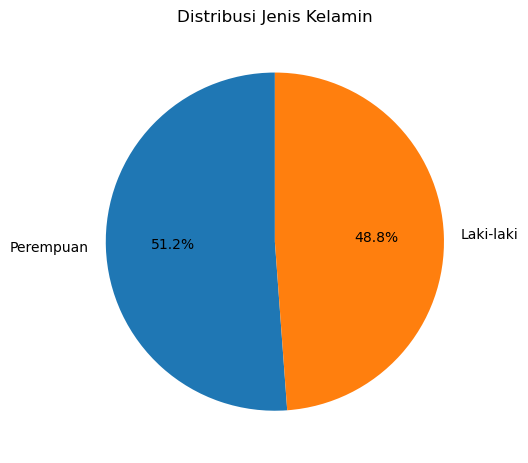

In [15]:
gender_counts_ya = df_musik_ya['Jenis Kelamin'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_counts_ya, labels=gender_counts_ya.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Kelamin')

Perbedaan proporsi gender di sangat kecil (kurang dari 5%), yang berarti distribusi jenis kelamin cukup seimbang di antara keduanya. Tidak ada kecenderungan kuat bahwa salah satu gender lebih dominan dalam preferensi mendengarkan atau tidak mendengarkan musik saat belajar.

In [16]:
df_musik_ya.describe()

,Seberapa sering Anda mendengarkan musik ketika belajar?,Saya tidak bisa belajar tanpa mendengarkan musik.,Saya lebih memilih musik tanpa lirik saat belajar dibandingkan musik dengan lirik.,Musik membuat saya lebih termotivasi untuk belajar.,Musik membantu saya mempertahankan konsentrasi dalam waktu lama.,Musik membantu saya mengurangi stres saat mengerjakan tugas.,Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.,Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.,Efektivitas belajar dengan musik bergantung dengan suasana hati.
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,4.139535,3.077519,3.387597,3.883721,3.720930,4.108527,3.612403,3.720930,3.790698
std,0.916380,1.247575,1.200977,0.853558,0.926829,0.868191,1.017887,1.038153,1.129674
min,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
categorical_cols_ya = df_musik_ya.select_dtypes(include='object').columns
numerical_cols_ya = df_musik_ya.select_dtypes(include=['int64','float64']).columns

print("Categorical variable pada orang yang mendengarkan musik saat belajar:\n", categorical_cols_ya)
print("\nNumerical variable pada orang yang mendengarkan musik saat belajar:\n", numerical_cols_ya)

Categorical variable pada orang yang mendengarkan musik saat belajar:
 Index(['Jenis Kelamin',
       'Apakah Anda menyarankan orang lain untuk mendengarkan musik saat belajar?',
       'Seberapa banyak musik membantu konsentrasi Anda saat membaca teori?',
       'Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan tugas?',
       'Seberapa banyak musik membantu konsentrasi Anda saat mengerjakan laporan atau paper?',
       'Seberapa banyak musik membantu konsentrasi Anda saat belajar untuk ujian?',
       'Seberapa banyak musik membantu konsentrasi Anda saat diskusi kelompok?',
       'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!',
       'Mengapa Anda mendengarkan jenis lagu tersebut?',
       'Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  '],
      dtype='object')

Numerical variable pada orang yang mendengarkan musik saat belajar:
 Index(['Seberapa sering Anda mendengarkan musik ketika belajar?',
     

In [18]:
mean_values = df_musik_ya[numerical_cols_ya].mean()
print("Mean values for numerical columns in df_musik_ya:")
print(mean_values)

Mean values for numerical columns in df_musik_ya:
Seberapa sering Anda mendengarkan musik ketika belajar?                                   4.139535
Saya tidak bisa belajar tanpa mendengarkan musik.                                         3.077519
Saya lebih memilih musik tanpa lirik saat belajar dibandingkan musik dengan lirik.        3.387597
Musik membuat saya lebih termotivasi untuk belajar.                                       3.883721
Musik membantu saya mempertahankan konsentrasi dalam waktu lama.                          3.720930
Musik membantu saya mengurangi stres saat mengerjakan tugas.                              4.108527
Saya lebih cepat menyelesaikan tugas jika sambil mendengarkan musik.                      3.612403
Efektivitas belajar dengan musik bergantung dengan mata kuliah yang sedang dipelajari.    3.720930
Efektivitas belajar dengan musik bergantung dengan suasana hati.                          3.790698
dtype: float64


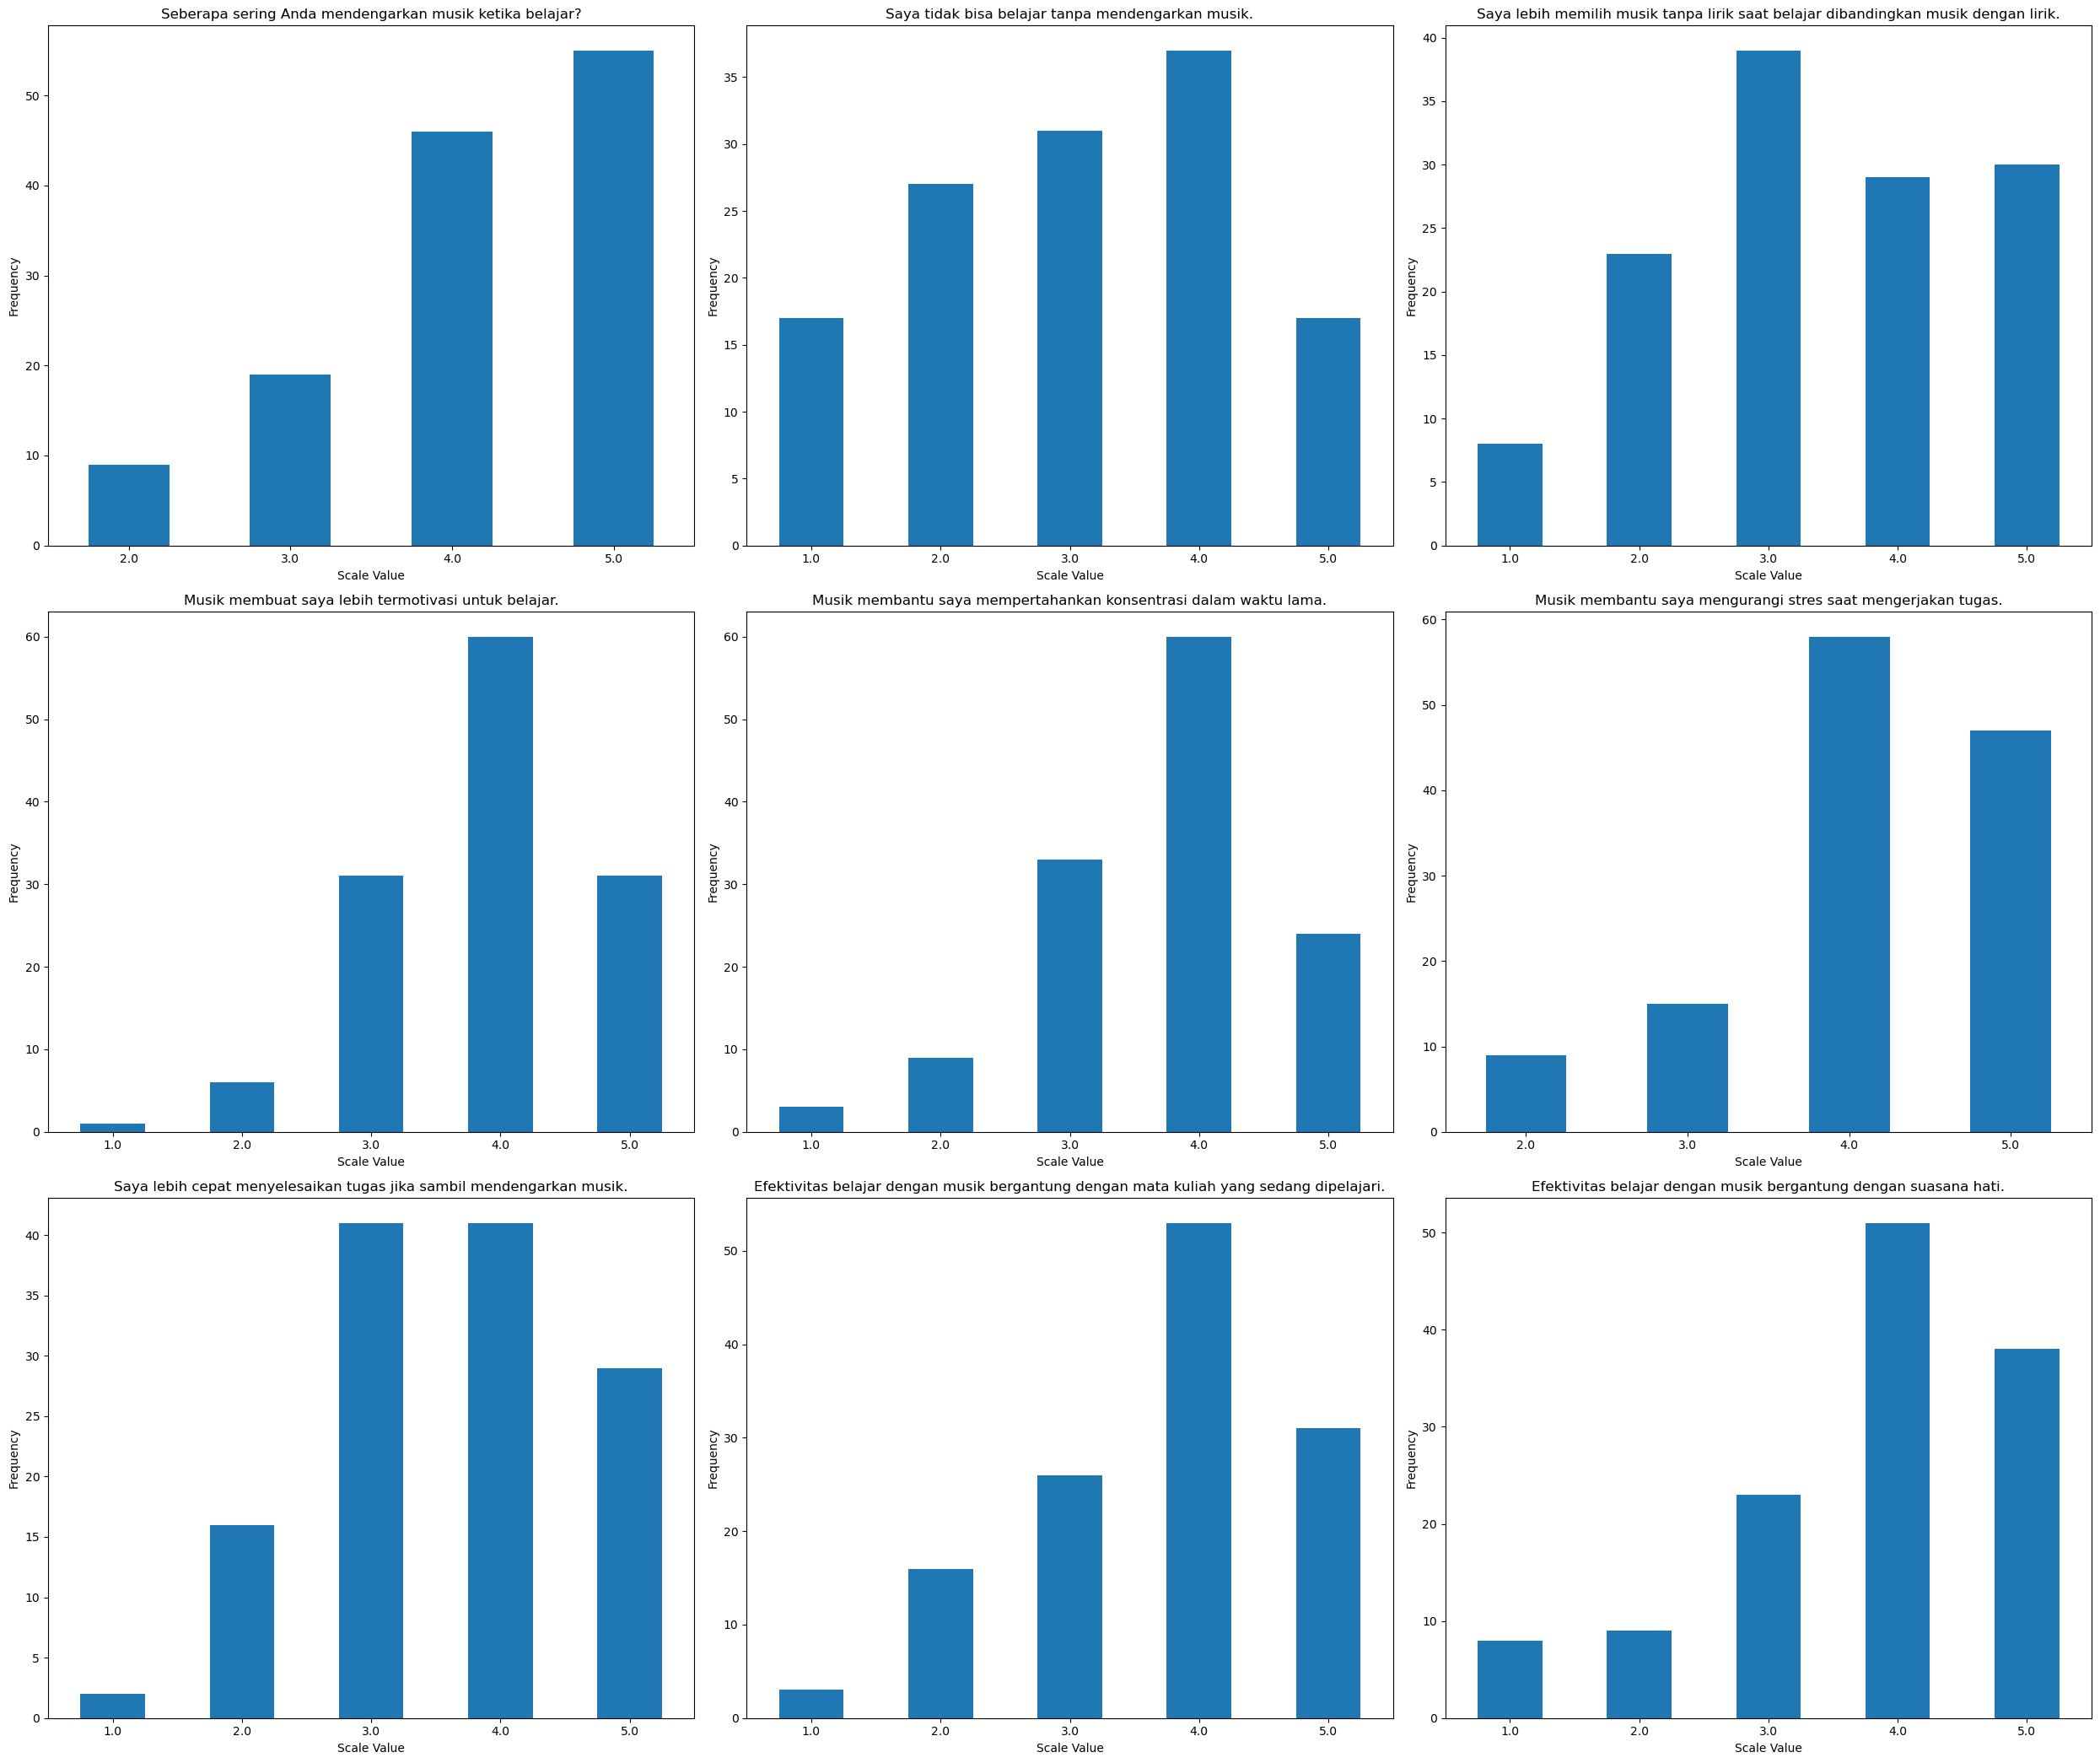

In [19]:
num_cols = len(numerical_cols_ya)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(25, num_rows * 7))

for i, col in enumerate(numerical_cols_ya):
    plt.subplot(num_rows, 3, i + 1)
    value_counts = df_musik_ya[col].value_counts().sort_index()
    value_counts.plot(kind='bar')
    plt.title(col)
    plt.xlabel('Scale Value')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Berdasarkan grafik skala Likert di atas, dapat diketahui bahwa:
* Musik dianggap meningkatkan motivasi belajar dan membantu mengurangi stres ketika mengerjakan tugas.
* Preferensi terhadap musik tanpa lirik cukup tinggi, kemungkinan besar karena dianggap lebih meningkatkan konsentrasi dibanding musik dengan lirik.
* Efektivitas musik saat belajar juga dipengaruhi mata kuliah yang dipelajari dan suasana hati mahasiswa.

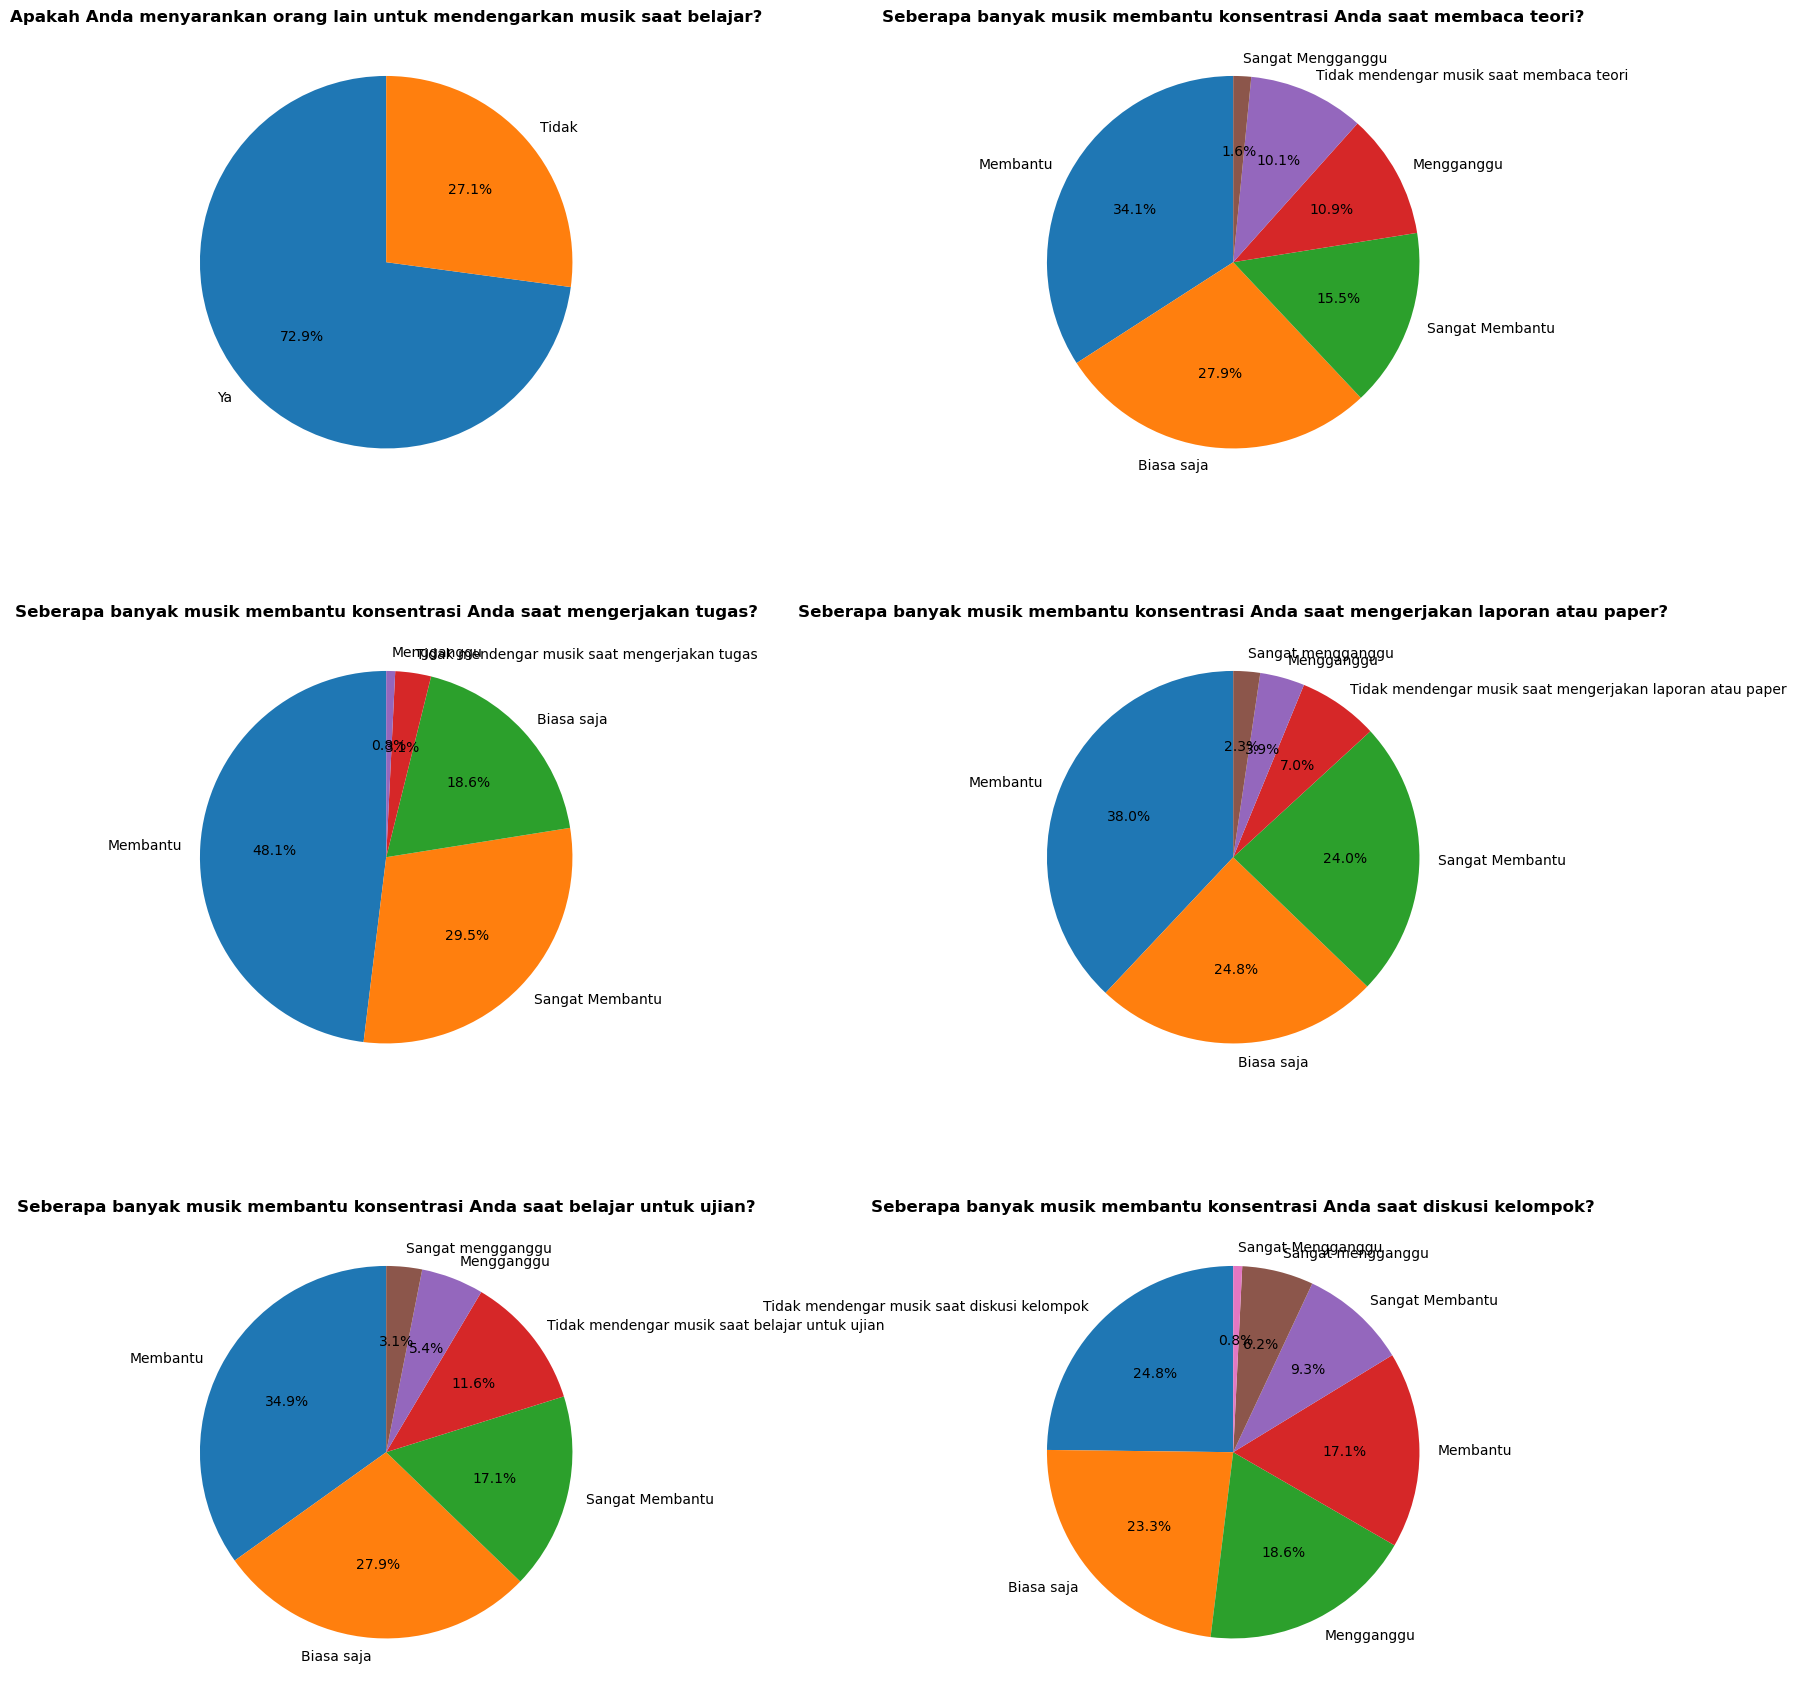

In [20]:
cols_to_exclude = [
    'Jenis Kelamin',
    'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!',
    'Mengapa Anda mendengarkan jenis lagu tersebut?',
    'Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  '
]
categorical_cols_for_plotting = [col for col in categorical_cols_ya if col not in cols_to_exclude]

num_cols = len(categorical_cols_for_plotting)
num_rows = (num_cols + 1) // 2
plt.figure(figsize=(16, num_rows * 6))

for i, col in enumerate(categorical_cols_for_plotting, 1):
    plt.subplot(num_rows, 2, i)
    value_counts = df_musik_ya[col].value_counts()

    wedges, texts, autotexts = plt.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10}
    )
    
    plt.title(col, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

* Mayoritas responden (72,9%) merekomendasikan orang lain untuk mendengarkan musik saat belajar.
* Mayoritas responden merasa musik membantu konsentrasi belajar, terutama saat mengerjakan tugas dan laporan. Namun untuk diskusi kelompok hasilnya lebih beragam, yaitu ada yang terbantu, ada juga yang terganggu.

In [21]:
df['Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'].value_counts()

Sebutkan satu genre musik yang paling sering didengarkan saat belajar!
pop                       31
jazz                      17
lofi                      10
klasik                     7
instrumental               7
kpop                       4
Pop                        3
acoustic                   2
lo-fi                      2
classic                    2
indie rock                 2
edm                        2
rnb                        2
japanese jazz              2
Classic                    1
klasik dan rnb             1
acoustic guitar            1
cpop                       1
background music           1
alternative rock           1
anisong                    1
pop modern                 1
indie pop                  1
tidak ada                  1
jpop                       1
tidak ada genre khusus     1
ost                        1
dangdut                    1
house                      1
gamelan bali               1
alternative                1
soft electric              1
j

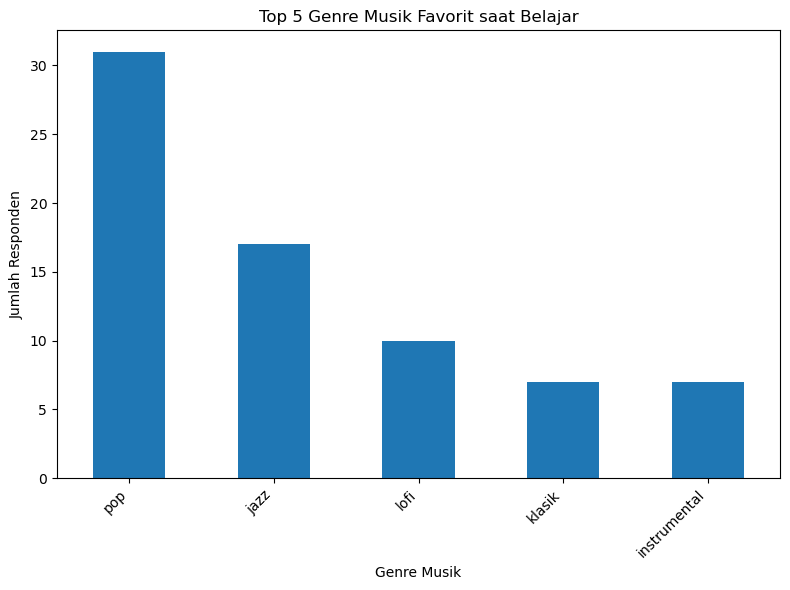

In [22]:
genre_col = 'Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'
if genre_col in df_musik_ya.columns:
    genre_counts = df_musik_ya[genre_col].value_counts()

    top_5_genres = genre_counts.head(5)

    plt.figure(figsize=(8, 6))
    top_5_genres.plot(kind='bar')
    plt.title('Top 5 Genre Musik Favorit saat Belajar')
    plt.xlabel('Genre Musik')
    plt.ylabel('Jumlah Responden')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{genre_col}' not found in df_musik_ya.")

# Text Preprocessing

In [24]:
import re, string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [25]:
stopwords_id = set(stopwords.words("indonesian"))

In [26]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords_id]
    return " ".join(tokens)

In [27]:
kolom_teks_ya = [
    "Mengapa Anda mendengarkan jenis lagu tersebut?",
    "Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  "
]

for col in kolom_teks_ya:
    df_musik_ya[col] = df_musik_ya[col].astype(str).apply(clean_text)

In [28]:
df_musik_tidak['Kenapa Anda tidak mendengarkan musik saat belajar? '] = df_musik_tidak['Kenapa Anda tidak mendengarkan musik saat belajar? '].astype(str).apply(clean_text)

In [29]:
def normalize_genre(text):
    text = str(text).lower().strip()
    
    if text in ['pop','genre pop','pop modern','soft pop','c-pop','cpop','j-pop','jpop','j-POP','kpop','Genre Pop', 'Pop Rnb']:
        return 'Pop'
    elif text in ['jazz','japanese jazz']:
        return 'Jazz'
    elif text in ['lofi','lo-fi']:
        return 'Lofi'
    elif text in ['klasik','classic','classical','Classic']:
        return 'Klasik'
    elif text in ['instrumental','orchestra']:
        return 'Instrumental'
    elif text in ['rnb','rnb asia']:
        return 'R&B'
    elif text in ['rock','alternative rock','slow rock']:
        return 'Rock'
    elif text in ['acoustic','acoustic guitar','akustik']:
        return 'Acoustic'
    elif text in ['edm','electronic','house','soft electric']:
        return 'EDM'
    elif text in ['dangdut']:
        return 'Dangdut'
    elif text in ['indie pop','alternative','indie rock']:
        return 'Indie/Alternative'
    else:
        return 'Lainnya'


# Text Analysis

## 1. Genre Musik Paling Sering Didengar Saat Belajar

<Axes: xlabel='genre_norm'>

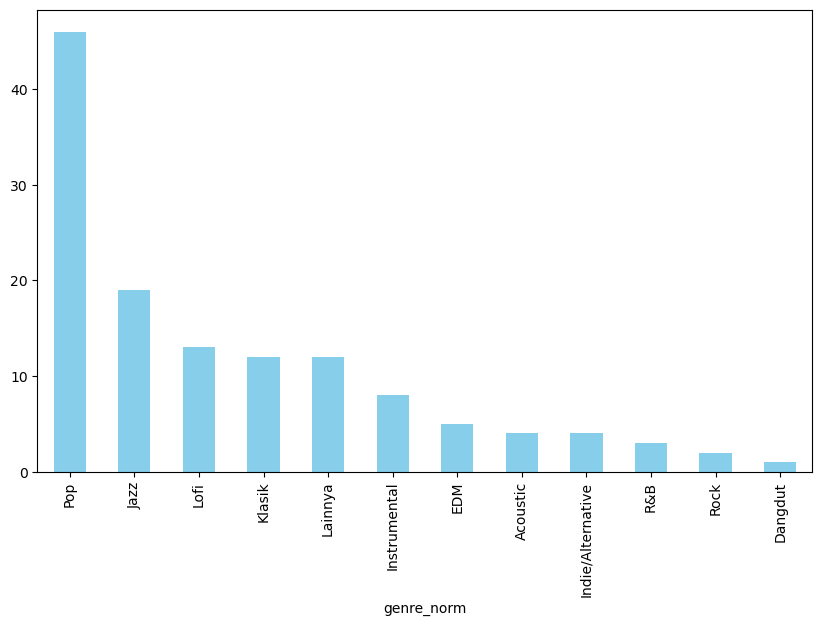

In [30]:
df_musik_ya['genre_norm'] = df_musik_ya['Sebutkan satu genre musik yang paling sering didengarkan saat belajar!'].apply(normalize_genre)
df_musik_ya['genre_norm'].value_counts().plot(kind='bar', figsize=(10,6), color='skyblue')

In [31]:
df_musik_ya["genre_norm"].value_counts()

genre_norm
Pop                  46
Jazz                 19
Lofi                 13
Klasik               12
Lainnya              12
Instrumental          8
EDM                   5
Acoustic              4
Indie/Alternative     4
R&B                   3
Rock                  2
Dangdut               1
Name: count, dtype: int64

Berdasarkan hasil di atas dapat diketahui bahwa genre musik yang paling sering didengarkan mahasiswa ketika belajar adalah: 
* Pop (46)
* Jazz (19)
* Lofi (13)

## 2. Alasan Mendengarkan Genre Tersebut Saat Belajar (Top 3 Genre)

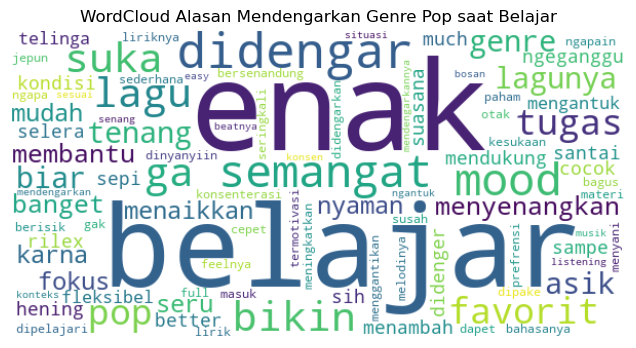

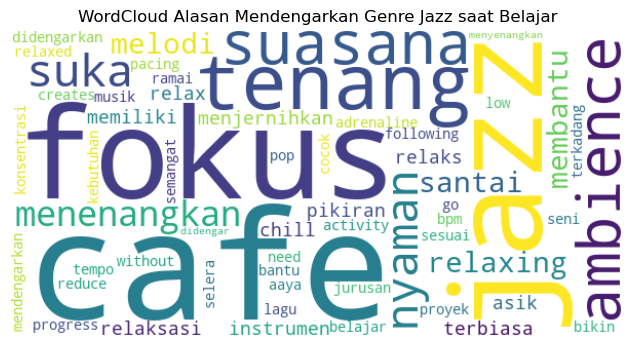

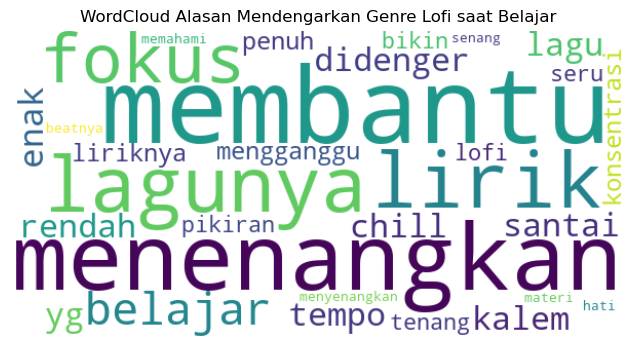

In [32]:
top3 = df_musik_ya["genre_norm"].value_counts().head(3).index

for g in top3:
    text = " ".join(df_musik_ya[df_musik_ya["genre_norm"] == g]["Mengapa Anda mendengarkan jenis lagu tersebut?"].dropna())
    if text.strip():
        wc = WordCloud(width=600, height=300, background_color="white").generate(text)
        plt.figure(figsize=(8,4))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"WordCloud Alasan Mendengarkan Genre {g} saat Belajar")
        plt.show()

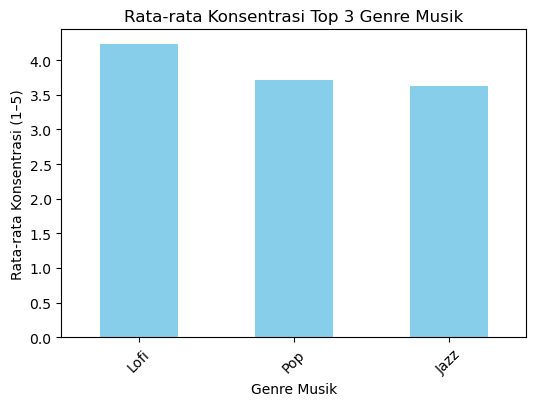

In [33]:
genre_conc = (
    df_musik_ya[df_musik_ya["genre_norm"].isin(top3)]
    .groupby("genre_norm")["Musik membantu saya mempertahankan konsentrasi dalam waktu lama."]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(6,4))
genre_conc.plot(kind="bar", color="skyblue")
plt.ylabel("Rata-rata Konsentrasi (1–5)")
plt.xlabel("Genre Musik")
plt.title("Rata-rata Konsentrasi Top 3 Genre Musik")
plt.xticks(rotation=45)
plt.show()

In [34]:
print(genre_conc)

genre_norm
Lofi    4.230769
Pop     3.717391
Jazz    3.631579
Name: Musik membantu saya mempertahankan konsentrasi dalam waktu lama., dtype: float64


Dari hasil analisis di atas, dapat diketahui bahwa:
* Pop lebih banyak dipilih karena faktor kesukaan & suasana menyenangkan.
* Jazz dan Lofi lebih kuat hubungannya dengan alasan kognitif, yaitu fokus dan menenangkan.
* Lofi terbukti memiliki skor konsentrasi tertinggi (berdasarkan pengukuran skala Likert).

## 3. Pengalaman Mendengarkan Musik saat Belajar

In [35]:
def text_mining_analysis(df, col_name, title_prefix=""):
    # WordCloud
    text = " ".join(df[col_name].dropna())
    wc = WordCloud(width=600, height=300, background_color="white").generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud - {title_prefix}")
    plt.show()

    # TF-IDF
    tfidf = TfidfVectorizer(max_features=500, ngram_range=(1,2))
    X_tfidf = tfidf.fit_transform(df[col_name].dropna())
    mean_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()
    top_idx = mean_scores.argsort()[::-1][:15]
    top_words = pd.DataFrame({
        "Kata": tfidf.get_feature_names_out()[top_idx],
        "Skor TF-IDF": mean_scores[top_idx]
    })
    
    plt.figure(figsize=(8,5))
    plt.barh(top_words["Kata"][::-1], top_words["Skor TF-IDF"][::-1], color="skyblue")
    plt.xlabel("Skor TF-IDF")
    plt.title(f"Top 15 Kata - {title_prefix}")
    plt.show()

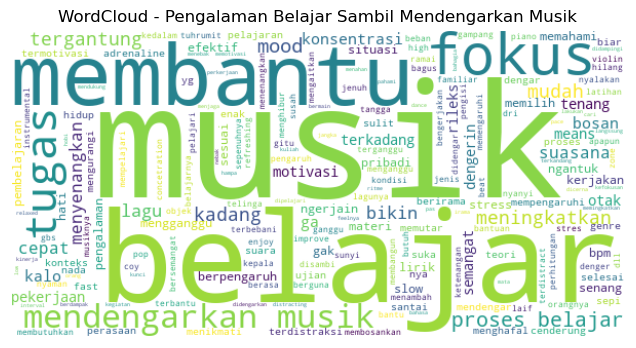

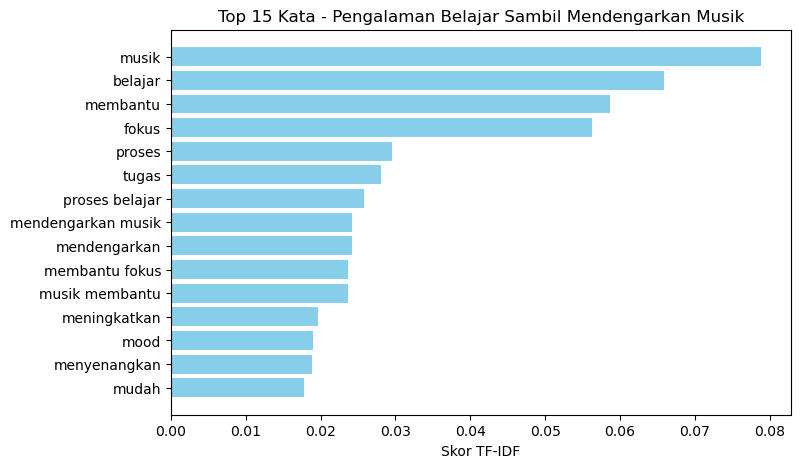

In [36]:
text_mining_analysis(df_musik_ya, "Apa komentar atau pengalaman pribadi Anda tentang pengaruh musik dalam proses belajar?  ","Pengalaman Belajar Sambil Mendengarkan Musik")

WordCloud dan TF-IDF menunjukkan kata dominan seperti musik, belajar, membantu, fokus, tugas, dan proses belajar. Hal ini menegaskan bahwa mahasiswa melihat musik sebagai pendukung belajar, baik secara kognitif (meningkatkan fokus, konsentrasi, dan mempermudah tugas) maupun secara emosional (menciptakan suasana menyenangkan dan meningkatkan mood).

# Kesimpulan

1. Sebagian besar mahasiswa mendengarkan musik saat belajar dan menilai musik membantu mereka fokus, termotivasi, dan mengurangi stres.  
2. Efektivitas musik tergantung pada situasi belajar (lebih membantu saat membaca teori, mengerjakan tugas, dan menulis laporan; kurang efektif saat ujian atau diskusi kelompok).  
3. Genre populer yang paling banyak dipilih adalah Pop, Jazz, dan Lofi.  
   - Pop: dipilih karena faktor kesukaan dan suasana menyenangkan.  
   - Jazz: memberi ketenangan dan suasana fokus.  
   - Lofi: serupa dengan jazz, namun paling efektif untuk konsentrasi (tempo stabil, minim distraksi lirik).  
4. Analisis teks menunjukkan kata dominan seperti fokus, membantu, konsentrasi, tenang, menyenangkan. Hal ini memperkuat persepsi bahwa musik berperan positif dalam proses belajar.  

Secara keseluruhan, musik ternyata bukan hanya sekadar hiburan, tetapi juga bisa menjadi salah satu teman belajar yang efektif. Dari sisi kognitif, musik membantu fokus, konsentrasi, dan produktivitas. Dari sisi emosional, musik bikin suasana belajar jadi lebih tenang, menyenangkan, dan mengurangi stres. Dengan memilih genre yang tepat, musik bisa jadi strategi sederhana untuk membuat belajar lebih optimal.